In [56]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

In [58]:
 #sklearn preproc

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from covid_time_series_prediction.dp_logic.RNN_model import model_run, get_RNN_model_API

In [59]:
data_index=pd.read_csv('../covid_time_series_prediction/data/data_raw_index/data_France', index_col=False)

In [60]:
data_index.head()

,Unnamed: 0,date,gov_response,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,0,2020-01-24,4.69,5.36,5.56,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-25,11.98,13.69,5.56,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-26,11.98,13.69,5.56,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-27,11.98,13.69,5.56,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-28,11.98,13.69,5.56,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
data_index=data_index.set_index('date')

In [62]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,Unnamed: 0,gov_response,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-02-03,10,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-04,11,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,12,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,13,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,14,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
data_index=data_index.fillna(0)

In [64]:
data_index.head()

,Unnamed: 0,gov_response,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-02-03,10,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-04,11,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,12,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,13,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,14,11.98,13.69,5.56,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Date')

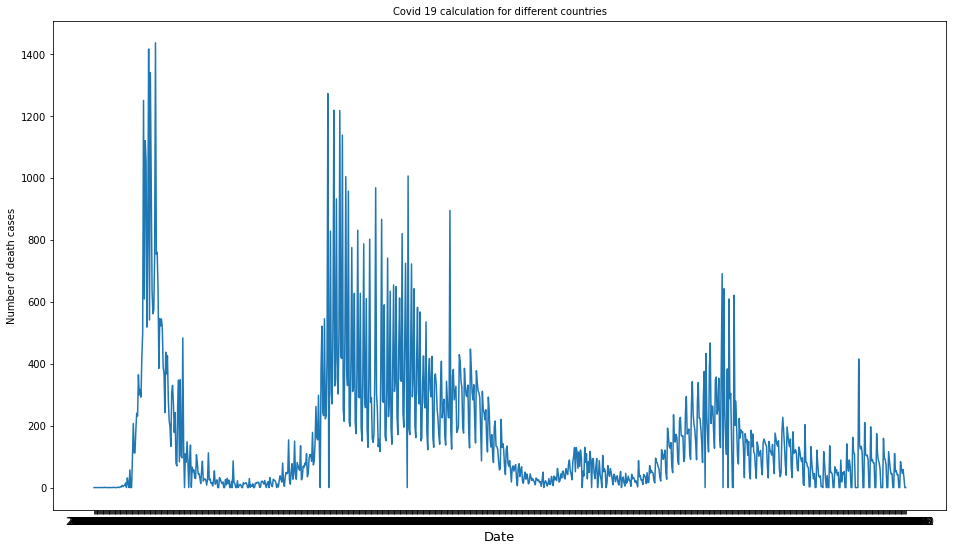

In [65]:
fig, ax = plt.subplots(1, figsize=(16,9))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

/Users/tekyteka/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'Date')

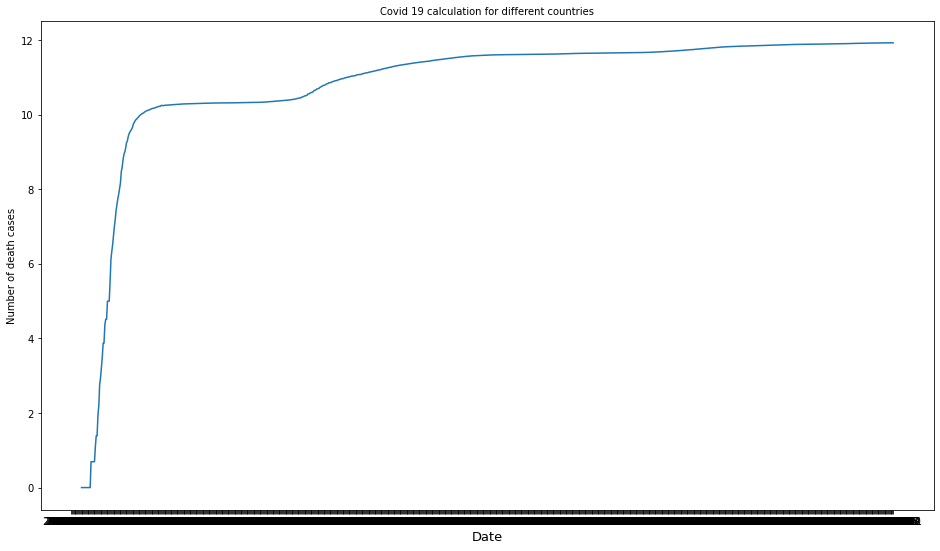

In [66]:
fig, ax = plt.subplots(1, figsize=(16,9))
plt.plot(data_index.index,np.log(data_index['total_deaths']));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

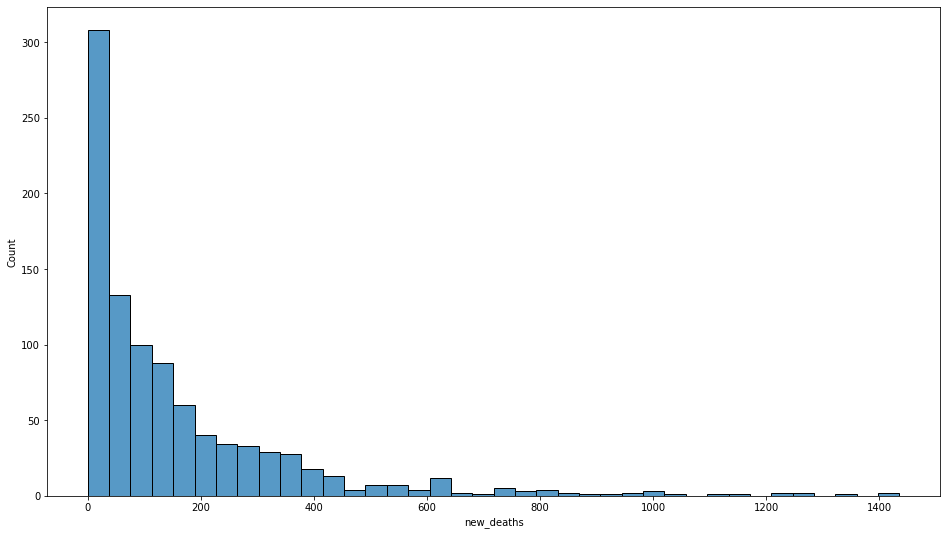

In [67]:

plt.figure(figsize=(16,9))
sns.histplot(data_index['new_deaths'])

## RNN model prediction

In [ ]:
y_pred, y_test = get_RNN_model_API('France', return_test=True)

In [ ]:
y_pred.shape, y_test.shape

In [ ]:
y_pred
# ALBERTO

In [ ]:
y_pred, y_test = get_RNN_model_API('France', return_test=True, switch_to_index=True)
y_pred
# SUMEDHA

Hello new function here for index (of Sumedha)...


Text(0.5, 0, 'Date')

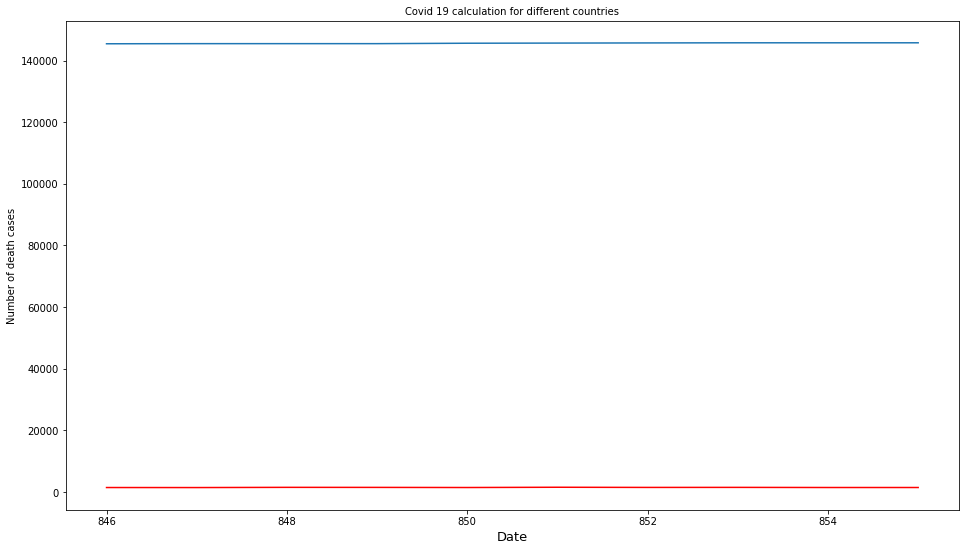

In [71]:
fig, ax = plt.subplots(1, figsize=(16,9))
plt.plot(y_test.index[:10],y_pred[:10],color='r');
plt.plot(y_test.index[:10],y_test[:10]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

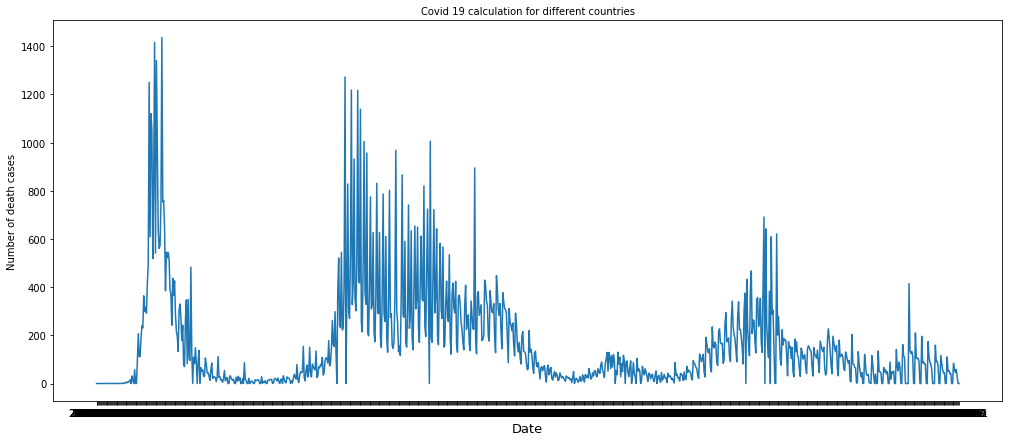

In [72]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
# plt.plot(y_test.index[:10],y_pred[:10],color='r');
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

In [73]:
y_index = ['2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21']

Text(0.5, 0, 'Date')

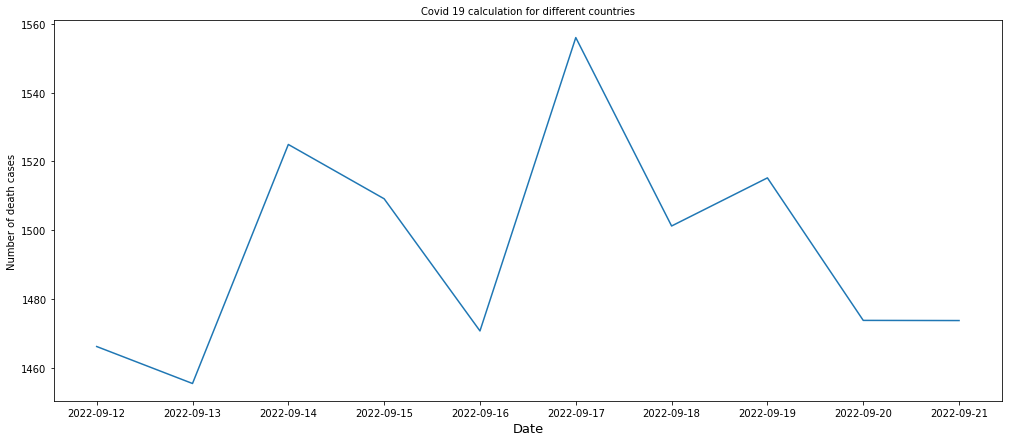

In [74]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_index,y_pred);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)